In [58]:
from tensorflow import keras

from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib import style

imagepaths = []

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))

681


In [8]:
IMG_SIZE=128
X=[]
y=[]
for i, image in enumerate(imagepaths):
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('input\\pothole-detection-dataset\\normal')):
            y.append('NORMAL')
        else:
            y.append('POTHOLES')
    except:
        pass

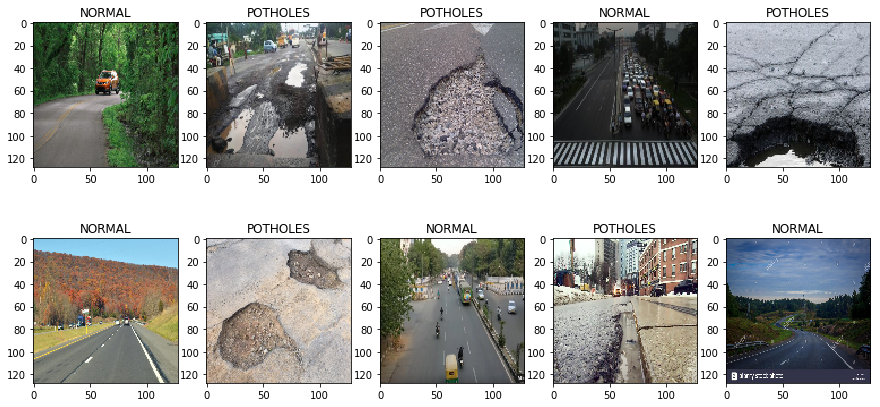

In [9]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [20]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
X=np.array(X)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)
y_train = y_train[:,1]
y_test = y_test[:,1]

In [21]:
# Create a CNN Sequential Model
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'tanh', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='tanh')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='tanh')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='tanh')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [22]:
#Model configuration for training purpose
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 128)       147584    
__________

In [25]:
model.fit(x_train, y_train, epochs=10, batch_size=16, verbose=1, 
         validation_data=(x_test, y_test))

Train on 510 samples, validate on 170 samples
Epoch 1/10
510/510 [==============================] - 50s 98ms/step - loss: 0.7325 - acc: 0.7373 - val_loss: 0.2960 - val_acc: 0.8706
Epoch 2/10
510/510 [==============================] - 52s 102ms/step - loss: 0.4442 - acc: 0.8118 - val_loss: 1.0861 - val_acc: 0.6471
Epoch 3/10
510/510 [==============================] - 51s 99ms/step - loss: 0.6076 - acc: 0.8333 - val_loss: 0.3559 - val_acc: 0.8647
Epoch 4/10
510/510 [==============================] - 51s 99ms/step - loss: 0.2405 - acc: 0.8922 - val_loss: 0.2759 - val_acc: 0.9059
Epoch 5/10
510/510 [==============================] - 57s 112ms/step - loss: 0.3164 - acc: 0.8843 - val_loss: 0.4759 - val_acc: 0.8529
Epoch 6/10
510/510 [==============================] - 60s 117ms/step - loss: 0.2188 - acc: 0.9216 - val_loss: 0.2265 - val_acc: 0.9059
Epoch 7/10
510/510 [==============================] - 53s 103ms/step - loss: 0.1786 - acc: 0.9373 - val_loss: 0.5419 - val_acc: 0.8294
Epoch 8/10
5

In [71]:
loss, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: ', float(accuracy*100),'%')

170/170 [==============================] - 7s 41ms/step
Test accuracy:  89.41176477600547 %


In [32]:
# Making predictions on test data
prediction = model.predict(x_test)

In [33]:
#Transform predictions into 1D array 
y_pred = np.array(np.where(prediction>0.5, 1, 0))
pred = []
for l in y_pred:
    for element in l:
        pred.append(element)
print(pred)

[0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0]


In [34]:
y_test=y_test.astype(bool)
y_pred = np.array(pred).astype(bool)
tp = sum(y_test & y_pred)
tn = sum(~y_test & ~y_pred)
fn = sum(y_test & ~y_pred)
fp = sum(~y_test & y_pred)

In [35]:
#Create a Confusion Matrix for Evaluation
conMatrix = pd.DataFrame('conMatrix', columns=["Actual POTHOLE", "Actual NORMAL"],index=["Predicted POTHOLE", "Predicted NORMAL"])
conMatrix['Actual NORMAL']['Predicted NORMAL'] = tn
conMatrix['Actual NORMAL']['Predicted POTHOLE'] = fn
conMatrix['Actual POTHOLE']['Predicted NORMAL'] = fp
conMatrix['Actual POTHOLE']['Predicted POTHOLE'] = tp
print(conMatrix)

                  Actual POTHOLE Actual NORMAL
Predicted POTHOLE             85             3
Predicted NORMAL              15            67


In [98]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = (2*precision*recall)/(precision+recall)
print('F1 score = ',f1)

F1 score =  0.9042553191489362


7.836254686117172 %


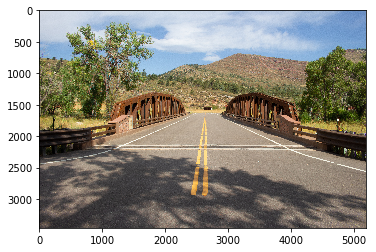

In [106]:
file = Image.open('input\\pothole-detection-dataset\\normal\\16.jpg')
plt.imshow(file)
img = np.resize(np.array(file), (1, 128, 128, 3))
test = model.predict(img)
print(test[0, 0]*100, '%')

In [36]:
model.save('prototype model')